
===== Running experiment: n_clusters=3 =====


Run 1 (clusters=3) Confusion Matrix:
[[225 109   0]
 [ 76 257   0]
 [  0   0 333]]



C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12295 (\N{IDEOGRAPHIC NUMBER ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


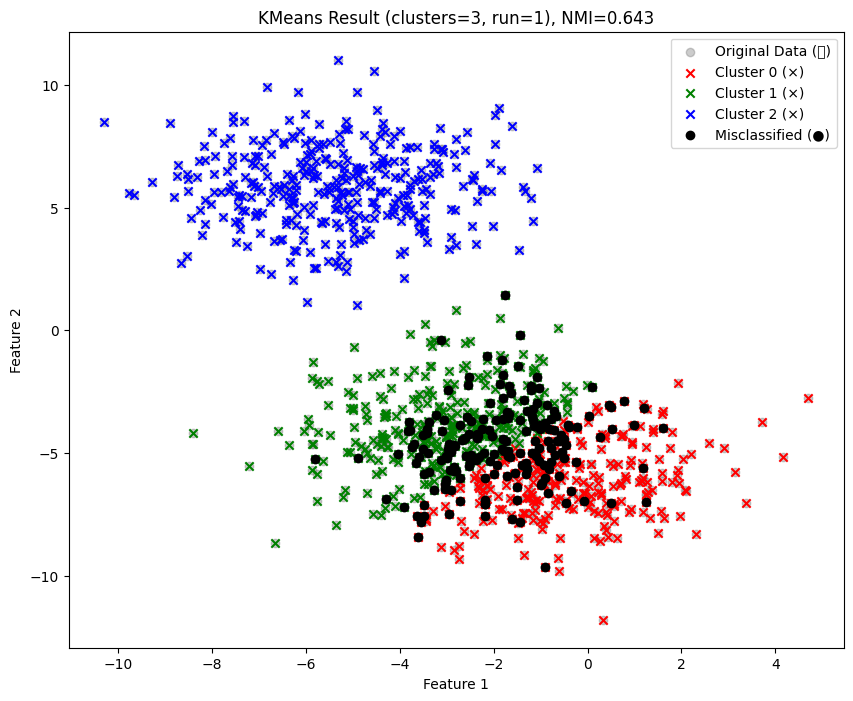


Run 2 (clusters=3) Confusion Matrix:
[[334   0   0]
 [  0 180 153]
 [333   0   0]]



C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12295 (\N{IDEOGRAPHIC NUMBER ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


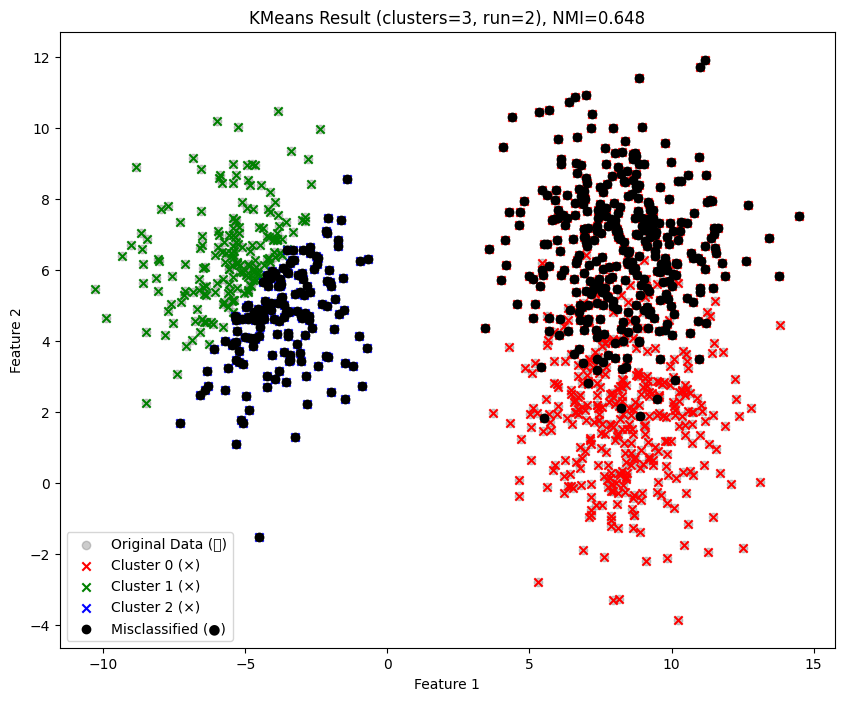


Run 3 (clusters=3) Confusion Matrix:
[[334   0   0]
 [  0 333   0]
 [  0   0 333]]



C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12295 (\N{IDEOGRAPHIC NUMBER ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


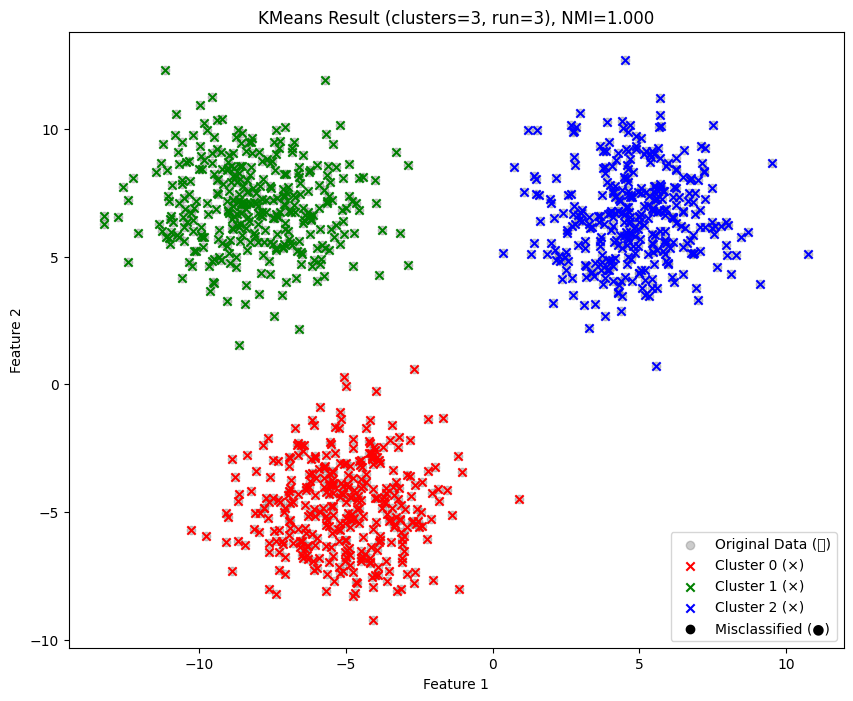


=== NMI Scores for n_clusters=3 ===
Run 1: 0.643
Run 2: 0.648
Run 3: 1.000
Average NMI: 0.764


===== Running experiment: n_clusters=2 =====


Run 1 (clusters=2) Confusion Matrix:
[[496   4]
 [  6 494]]



C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12295 (\N{IDEOGRAPHIC NUMBER ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


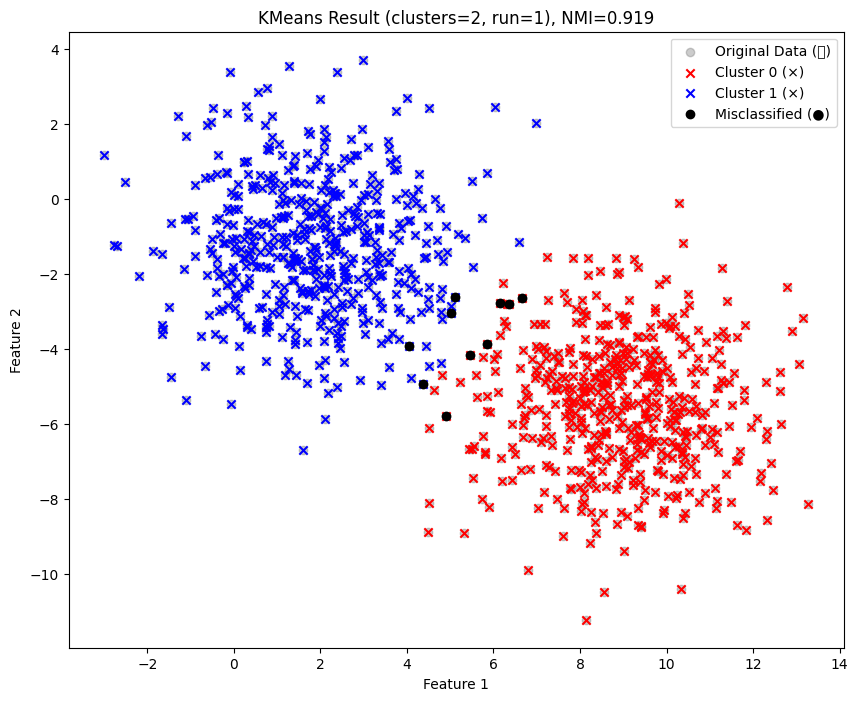


Run 2 (clusters=2) Confusion Matrix:
[[500   0]
 [  0 500]]



C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12295 (\N{IDEOGRAPHIC NUMBER ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


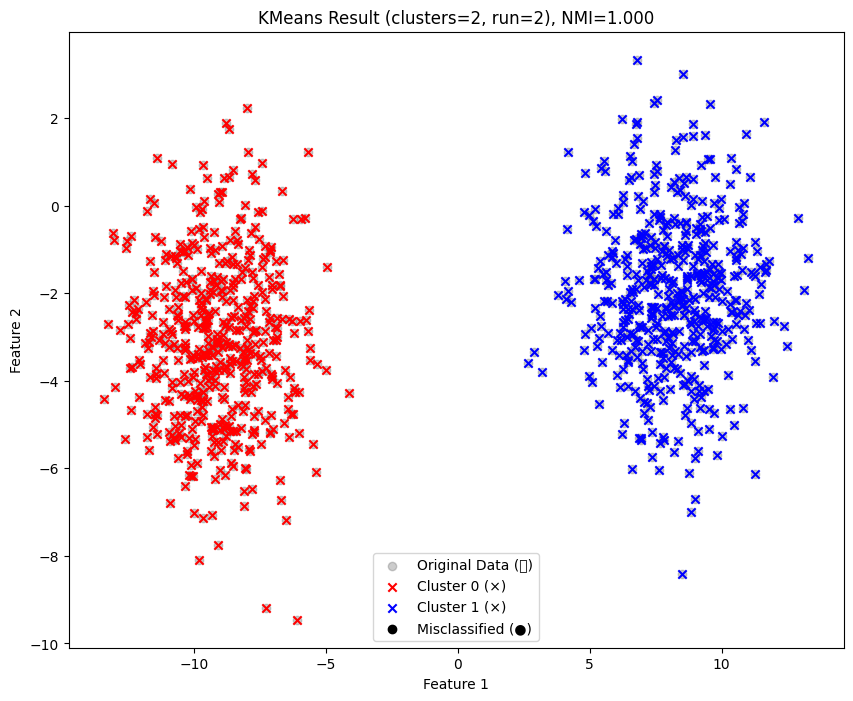


Run 3 (clusters=2) Confusion Matrix:
[[487  13]
 [ 19 481]]



C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12295 (\N{IDEOGRAPHIC NUMBER ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


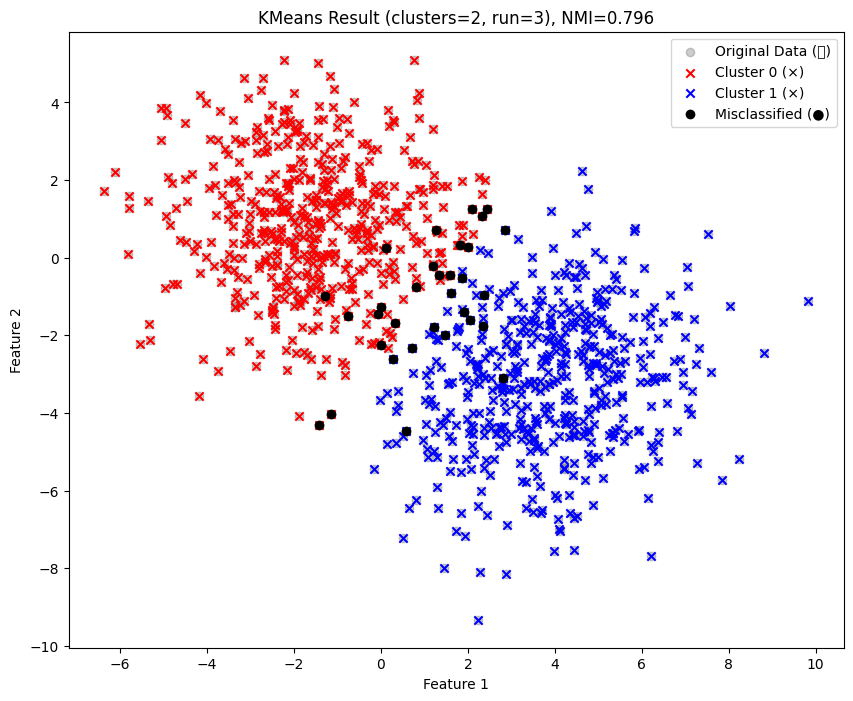


=== NMI Scores for n_clusters=2 ===
Run 1: 0.919
Run 2: 1.000
Run 3: 0.796
Average NMI: 0.905



In [2]:
from sklearn import datasets, cluster, metrics
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt


def run_experiment(n_clusters, n_runs=3):
    """
    n_clusters : クラスタ数（2 or 3）
    n_runs     : 繰り返し実行回数
    """
    print(f"\n===== Running experiment: n_clusters={n_clusters} =====\n")

    nmi_scores = []

    for i in range(n_runs):

        # データ生成（クラスタ数に合わせる）
        blobs, ground_truth = datasets.make_blobs(
            n_samples=1000,
            centers=n_clusters,
            cluster_std=1.75,
            random_state=14 * i + n_clusters * 100  # 重複を避ける
        )

        # KMeans
        kmeans = cluster.KMeans(
            n_clusters=n_clusters,
            random_state=i,
            n_init="auto"
        )
        kmeans.fit(blobs)

        # ラベルをハンガリアン法で整列
        contingency_matrix = metrics.cluster.contingency_matrix(
            ground_truth, kmeans.labels_
        )
        row_ind, col_ind = linear_sum_assignment(-contingency_matrix)

        remapped_labels = np.zeros_like(kmeans.labels_)
        for j, col in enumerate(col_ind):
            remapped_labels[kmeans.labels_ == col] = j

        # 誤分類点
        incorrect_points = blobs[ground_truth != remapped_labels]

        # NMI
        nmi_score = metrics.normalized_mutual_info_score(
            ground_truth, remapped_labels
        )
        nmi_scores.append(nmi_score)

        # 混合行列
        cm = metrics.confusion_matrix(ground_truth, remapped_labels)
        print(f"\nRun {i+1} (clusters={n_clusters}) Confusion Matrix:")
        print(cm)
        print()

        # プロット
        plt.figure(figsize=(10, 8))
        plt.scatter(blobs[:, 0], blobs[:, 1],
                    c='gray', marker='o', alpha=0.4,
                    label="Original Data (〇)")

        # 色設定
        if n_clusters == 2:
            colors = ['r', 'b']
        else:
            colors = ['r', 'g', 'b']

        # クラスタごとに描画
        for j in range(n_clusters):
            pts = blobs[remapped_labels == j]
            plt.scatter(pts[:, 0], pts[:, 1],
                        c=colors[j], marker='x',
                        label=f"Cluster {j} (×)")

        # 誤分類（黒丸）
        plt.scatter(incorrect_points[:, 0], incorrect_points[:, 1],
                    c='black', marker='o', label="Misclassified (●)")

        plt.title(f"KMeans Result (clusters={n_clusters}, run={i+1}), NMI={nmi_score:.3f}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()

    # 全体結果
    print(f"\n=== NMI Scores for n_clusters={n_clusters} ===")
    for r, score in enumerate(nmi_scores):
        print(f"Run {r+1}: {score:.3f}")
    print(f"Average NMI: {np.mean(nmi_scores):.3f}\n")


# ■■■ 実験開始 ■■■

# クラスタ数 3 の実験（3回）
run_experiment(n_clusters=3, n_runs=3)

# クラスタ数 2 の実験（3回）
run_experiment(n_clusters=2, n_runs=3)
